In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

## Look at the data

In [3]:
semeval_path = Path('data/SemEval2017-4A-English')
semeval_path.ls()

[PosixPath('data/SemEval2017-4A-English/readme.txt'),
 PosixPath('data/SemEval2017-4A-English/models'),
 PosixPath('data/SemEval2017-4A-English/test.csv'),
 PosixPath('data/SemEval2017-4A-English/data_lm.pkl'),
 PosixPath('data/SemEval2017-4A-English/train.csv')]

In [4]:
df_test = pd.read_csv(semeval_path/'test.csv', header=None, delimiter="\t")
df_test.head()

,0,1,2
0,801989080477154944,neutral,#ArianaGrande Ari By Ariana Grande 80% Full ht...
1,801989272341453952,positive,Ariana Grande KIIS FM Yours Truly CD listening...
2,801990978424962944,positive,Ariana Grande White House Easter Egg Roll in W...
3,801996232553963008,positive,#CD #Musics Ariana Grande Sweet Like Candy 3.4...
4,801998343442407040,neutral,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...


In [5]:
df_train = pd.read_csv(semeval_path/'train.csv', header=None, delimiter="\t")
df_train.head()

,0,1,2
0,260097528899452929,neutral,Won the match #getin . Plus\u002c tomorrow is ...
1,263791921753882624,neutral,Some areas of New England could see the first ...
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...
4,263816256640126976,neutral,Did y\u2019all hear what Tony Romo dressed up ...


In [6]:
print(df_test.shape, df_train.shape)

(11906, 3) (50083, 3)


In [7]:
df_test.columns = ['id', 'label', 'tweet']
df_train.columns = ['id', 'label', 'tweet']
df_train.head()

,id,label,tweet
0,260097528899452929,neutral,Won the match #getin . Plus\u002c tomorrow is ...
1,263791921753882624,neutral,Some areas of New England could see the first ...
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...
4,263816256640126976,neutral,Did y\u2019all hear what Tony Romo dressed up ...


In [8]:
df_test['label'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [9]:
df_train['label'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

## Pre-processing, filtering and deduplication

In [10]:
# To Do

In [11]:
import re

url_re = re.compile(r'(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?')
rep_re = re.compile(r'(.)\1{3,}')
mention_re = re.compile(r'(@[\w_-]+)')
hashtag_re = re.compile(r'(#[\w_-]+)')
email_re = re.compile(r'[a-zA-Z0-9.!#$%&\'*+/=?^_`{|}~-]+@[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?(?:\.[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?)*')

def preprocess(text):
    text = text.lower()   # ToDo: preserve case of emoticons such as :D
    text = email_re.sub('<email>', text)
    text = url_re.sub('<url>', text)
    text = rep_re.sub(r'\1\1', text)
    # Remove mentions but keep hashtags
    text = mention_re.sub('', text)

    return text

preprocess('@mention This is to #test a looooong link: http://www.google.com @apple pedro@latenitesoft.com')

' this is to #test a loong link: <url>  <email>'

In [12]:
df_test['tweet'] = df_test['tweet'].apply(preprocess)
df_train['tweet'] = df_train['tweet'].apply(preprocess)
df_test

,id,label,tweet
0,801989080477154944,neutral,#arianagrande ari by ariana grande 80% full <url>
1,801989272341453952,positive,ariana grande kiis fm yours truly cd listening...
2,801990978424962944,positive,ariana grande white house easter egg roll in w...
3,801996232553963008,positive,#cd #musics ariana grande sweet like candy 3.4...
4,801998343442407040,neutral,side to side 😘 #sidetoside #arianagrande #mus...
5,802001659970744064,positive,hairspray live! previews at the macy's thanksg...
6,802003380973568000,positive,#lindsaylohan is ‘feeling thankful’ after blas...
7,802014830467174016,neutral,i hate her but... i love her songs dammit ._.#...
8,802020578609623040,neutral,ariana grande 【right there ft. big sean】#アリアナ ...
9,802021059490934016,positive,which one would you prefer to listen to for a ...


## Use _all_ text to create a language model

In [13]:
text_df = df_train['tweet']
text_df = text_df.append(df_test['tweet'])
text_df.columns = ['tweet']
print(text_df.shape)
text_df.head()

(61989,)


0    won the match #getin . plus\u002c tomorrow is ...
1    some areas of new england could see the first ...
2     2nd worst qb. definitely tony romo. the man w...
3    #thailand washington - us president barack oba...
4    did y\u2019all hear what tony romo dressed up ...
Name: tweet, dtype: object

In [14]:
# Convert Series to DataFrame
text_df = DataFrame(text_df)
text_df.head()

,tweet
0,won the match #getin . plus\u002c tomorrow is ...
1,some areas of new england could see the first ...
2,2nd worst qb. definitely tony romo. the man w...
3,#thailand washington - us president barack oba...
4,did y\u2019all hear what tony romo dressed up ...


In [15]:
bs = 100

In [16]:
data_lm = (TextList.from_df(text_df, path=semeval_path, cols='tweet')
              .split_by_rand_pct(0.1, seed=17)
              .label_for_lm()
               .databunch(bs=bs))

In [17]:
# Save for later
data_lm.save('data_lm.pkl')

In [18]:
data_lm.show_batch()

idx,text
0,. xxbos # thailand washington - us president barack obama vowed wednesday as he visited storm - ravaged new jersey shore to ... < url > xxbos did y \ u2019all hear what tony romo dressed up as for halloween ? a giants xxunk ! cause that \ u2019s all he could throw to sunday night . xxbos tim tebow may be xxunk ! wow jerry \ u002c what the
1,"the world hates me xxbos they are going in on the lakers . mike brown may need to take notes .. xxbos ( and trust \ u002c i could talk forever about madonna \ u2019s choice of singles . would * anything * from xxunk had been a better 1st single than "" xxunk ? "" ) xxbos haha it \ u2019ll be alright . we got swansea on saturday"
2,xxunk xxbos you find her and you may get a reason to stay longer here in philly :-) xxbos lol yes look on wiki under the 29th . xxbos want to see lana del rey in london so much in may ! xxbos you get ready 1st . i otw back from school only . on ur skype 1st xxbos no new grey \ u2019s or scandal . :( must
3,were those polls abandoned ? xxbos capello says time for russia to win big match : russia manager fabio capello on thursday said that he intended to ... < url > xxbos xxunk goal ! jimmy martin sneaks a rebound past xxunk to give xxunk a 2 - 1 lead . xxunk & bellamy with the xxunk left 2nd period xxbos kick - off your weekend with service ! ev
4,the new \ u002c shown good discipline in the 1st 4 rounds tonight frankie \ u002c kept a cool head ! # xxunk xxbos working the celebrity xxunk game saturday at xxunk la $ 12 at the door . gon na be with kendrick lamar \ u002c rick ross \ u002c xxunk carson \ u002c ect . xxbos can \ u2019 t believe is only 2 days older than me


In [19]:
len(data_lm.vocab.itos)

16407

## Load pretrained language model

In [20]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


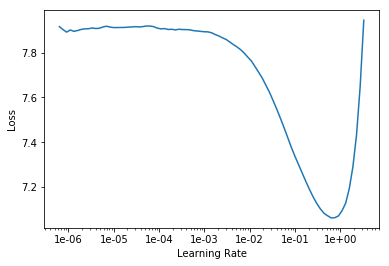

In [22]:
learn.recorder.plot()

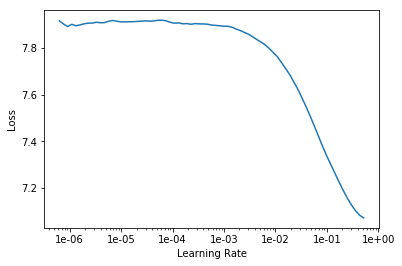

In [23]:
learn.recorder.plot(skip_end=15)

In [24]:
learn.fit_one_cycle(1, 3e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.030068,4.740429,0.241762,00:27


In [25]:
learn.save('fit_head')

## Unfreeze to fine-tune

In [26]:
learn.unfreeze()

In [27]:
torch.cuda.empty_cache()

In [28]:
learn.fit_one_cycle(9, 3e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.531154,4.561153,0.257558,00:32
1,4.416755,4.444188,0.267769,00:32
2,4.193397,4.355202,0.276286,00:32
3,3.964247,4.332478,0.280109,00:32
4,3.697937,4.347423,0.283476,00:32
5,3.429027,4.395639,0.282952,00:32
6,3.175354,4.455944,0.281463,00:32
7,2.996571,4.499282,0.280966,00:32
8,2.896019,4.525369,0.280388,00:32


In [29]:
learn.save('fine_tuned')

In [30]:
learn.save_encoder('fine_tuned_encoder')

## Sentiment Classifier

In [31]:
df_test['validation'] = True
df_train['validation'] = False
df_all = df_train.append(df_test)
df_all.shape

(61989, 4)

In [32]:
df_all.head()

,id,label,tweet,validation
0,260097528899452929,neutral,won the match #getin . plus\u002c tomorrow is ...,False
1,263791921753882624,neutral,some areas of new england could see the first ...,False
2,264194578381410304,negative,2nd worst qb. definitely tony romo. the man w...,False
3,264041328420204544,neutral,#thailand washington - us president barack oba...,False
4,263816256640126976,neutral,did y\u2019all hear what tony romo dressed up ...,False


In [33]:
sentiment_data = (TextList.from_df(df_all, path=semeval_path, cols='tweet', vocab=data_lm.vocab)
                 .split_from_df(col='validation')
                 .label_from_df(cols='label')
                 .databunch(bs=bs))

In [34]:
sentiment_data.valid_ds

LabelList (11906 items)
x: TextList
xxbos # arianagrande ari by ariana grande 80 % full < url >,xxbos ariana grande xxunk fm yours truly cd listening party in burbank < url >,xxbos ariana grande white house easter egg roll in washington < url >,xxbos # cd # musics ariana grande sweet like candy xxunk oz 100 ml sealed in box 100 % xxunk new < url >,xxbos side to side 😘 # xxunk # arianagrande # musically # xxunk # lgbt xxunk # xxunk … < url >
y: CategoryList
neutral,positive,positive,positive,neutral
Path: data/SemEval2017-4A-English

In [35]:
sentiment_data.classes

['negative', 'neutral', 'positive']

In [36]:
sentiment_data.show_batch()

text,target
xxbos all presidents of american except one are or have been related to the monarchy . david cameron is her 5th cousin ... < url > \n xxunk \t neutral \t on a we d at 10 am the queen always calls david cameron and pretends to be frank bruno . cameron falls for it every time # xxunk \n xxunk \t neutral \t david cameron says that,neutral
"xxbos jay - z : can i get a fuck you ? jay - z 's dad : i do n't know , can you ? jay - z : may i get a fuck you ? jay - z 's dad : no , it 's supper time . go wash up .",neutral
"xxbos lmao blake asked xtina "" "" are you bringing your grammy awards to the show tomorrow "" "" and she said "" "" no \ u002c there wouldn \ u2019 t be enough room "" "" lmfao ! ! !",neutral
"xxbos cafe one ? ! "" "" they lose dongwoo on a tuesday . "" "" is the first line is that the right fic no it doesn \ u2019 t seem like it wait link me ? ! lmao",negative
xxbos my name 's ashton & & i am a male i may be trans but that does n't make me any less manly than john cena or the rock i go by he / him or they / them,neutral


### Metrics

In [37]:
f1_score = partial(fbeta, beta=1)

In [38]:
def average_recall(y_pred, y):
    
    def compute_recall(tp_label, y_label):
        n_label = y_label.float().sum()
        if n_label == 0.0:
            return 0.0
        return tp_label.float().sum() / n_label
    
    n = y.shape[0]
    pred = y_pred.argmax(dim=-1).view(n, -1)
    y_true = y.view(n, -1)
        
    pred_neg = pred == 0
    y_neg = y_true == 0
    true_neg = pred_neg * y_neg

    pred_neu = pred == 1
    y_neu = y_true == 1
    true_neu = pred_neu * y_neu
    
    pred_pos = pred == 2
    y_pos = y_true == 2
    true_pos = pred_pos * y_pos
    
    recall_pos = compute_recall(true_pos, y_pos)
    recall_neg = compute_recall(true_neg, y_neg)
    recall_neu = compute_recall(true_neu, y_neu)
    
    #print("recall_pos", recall_pos, "recall_neg", recall_neg, "recall_neu", recall_neu)
    #print("true_pos", true_pos.float().sum(), "y_pos", y_pos.float().sum())
    #print("true_neg", true_neg.float().sum(), "y_neg", y_neg.float().sum())
    #print("true_neu", true_neu.float().sum(), "y_neu", y_neu.float().sum())
    #print("neg", y_neg.sum(), "neu", y_neu.sum(), "pos", y_pos.sum(), )
    
    return (recall_pos + recall_neg + recall_neu) / 3.0

In [39]:
metrics = [accuracy, average_recall]

In [40]:
learn = text_classifier_learner(sentiment_data, AWD_LSTM, drop_mult=0.3, metrics=metrics)
learn.load_encoder('fine_tuned_encoder')

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


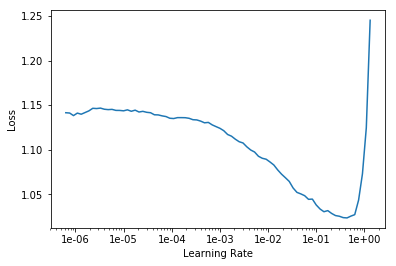

In [42]:
learn.recorder.plot()

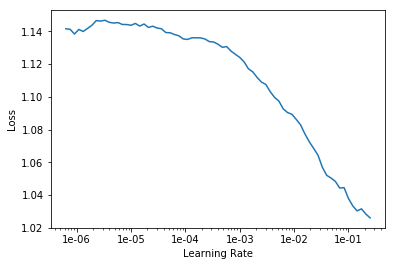

In [43]:
learn.recorder.plot(skip_end=14)

In [44]:
from fastai.callbacks.misc import StopAfterNBatches

In [45]:
#learn.fit_one_cycle(1, 2e-2, moms=(0.8, 0.7), callbacks=[StopAfterNBatches(n_batches=3)])
learn.fit_one_cycle(1, 2e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,average_recall,time
0,0.814725,0.813767,0.613052,0.583236,00:17


In [46]:
sentiment_data.valid_ds

LabelList (11906 items)
x: TextList
xxbos # arianagrande ari by ariana grande 80 % full < url >,xxbos ariana grande xxunk fm yours truly cd listening party in burbank < url >,xxbos ariana grande white house easter egg roll in washington < url >,xxbos # cd # musics ariana grande sweet like candy xxunk oz 100 ml sealed in box 100 % xxunk new < url >,xxbos side to side 😘 # xxunk # arianagrande # musically # xxunk # lgbt xxunk # xxunk … < url >
y: CategoryList
neutral,positive,positive,positive,neutral
Path: data/SemEval2017-4A-English

### Most of the predictions are `neutral`
Something must be wrong.
The situation improves after restarting everything and changing `drop_mult` to 0.3 (instead of 0.5) when building the `text_classifier_learner`. We now have an average_recall of 0.59 instead of 0.34. I also changed the batch size to 100 - I don't know whether it has an impact.

In [47]:
preds = learn.get_preds()

In [48]:
(preds[0].argmax(dim=-1))[:20]

tensor([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [49]:
preds[1][:20]

tensor([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [50]:
predictions = preds[0].argmax(dim=1)
predictions

tensor([0, 0, 0,  ..., 1, 1, 1])

In [51]:
(predictions == 0).sum(), (predictions == 1).sum(), (predictions == 2).sum()

(tensor(3420), tensor(5989), tensor(2497))

In [52]:
targets = preds[1]
(targets == 0).sum(), (targets == 1).sum(), (targets == 2).sum()

(tensor(3811), tensor(5743), tensor(2352))

In [53]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [54]:
learn.show_results(rows=20)

text,target,prediction
xxbos for a long time no one considered the effect of repeated xxunk on the brain . this was based on a mistaken ... < url > \n xxunk \t neutral \t xxunk caused death in america - every case of xxunk - the made up xxunk to cover up death by vaccines . < url > \n xxunk \t neutral \t study proving vaccines cause autism banned,negative,negative
"xxbos donald trump has reversed himself on abortion , banning muslims and even his central promise of building a wall on … < url > \n xxunk \t positive \t bill clinton built a wall on the mexican border in the 90s . # xxunk \n xxunk \t neutral \t < email > the is prepared to do a deal - u axe ur wall on mexican border",neutral,negative
"xxbos in the past year alone , over 100 women from limerick have xxunk to the uk to get access to abortion services ... < url > \n xxunk \t neutral \t 1 of america 's greatest presidents # xxunk quote on abortion “ i 've noticed that everyone who is for abortion … < url > \n xxunk \t negative \t like it 's about abortion 😞",neutral,negative
"xxbos the patches ] are being used to kill people with dementia , with the idea that it ’s cheapest and best to get rid of … < url > \n xxunk \t neutral \t important for research paper : should euthanasia / assisted suicide be an option for suffering terminally ill patience \n xxunk \t negative \t when euthanasia is xxunk , i 'm not going",negative,neutral
xxbos i do n't support animal cruelty but i 'm okay with giving my money to companies that do so they continue testing on … < url > \n xxunk \t negative \t i 'm not for the animal cruelty or animal testing tbh \n xxunk \t neutral \t i just do n't get what 's the big deal of using mac products like i love mac &,neutral,negative
"xxbos of course they would cease ; no clinton in high power right now , so no cash ! watch charity foundation cease to xxunk … < url > \n xxunk \t neutral \t i see that jill stein filed to have a vote recount in wisconsin . i wonder how much she received from the clinton foundation for her service \n xxunk \t neutral \t no",negative,negative
"xxbos donald trump is n’t just xxunk to xxunk us climate policies as president . his transition team is also talking ... < url > \n xxunk \t negative \t instead of being xxunk at the spectacle of trump 's transition , liberals should try a more level - headed approach . … < url > \n xxunk \t neutral \t it 's kris kobach 's plan ...",negative,negative
xxbos the alleged xxunk came the same day that ukrainian president petro poroshenko met with eu leaders for a xxunk … < url > \n xxunk \t neutral \t i 'll say it again . i 'm willing to bet a xxunk of xxunk that poroshenko will use xxunk 's 1999 strategy and win the presidential election \n xxunk \t neutral \t poroshenko sure trump will not change,neutral,neutral
"xxbos he wants to break up the country ’s biggest companies , meet with xxunk korean leader kim jong un & throw president p … < url > \n xxunk \t neutral \t shout out car crashes . shout out kim jong un . shout out the lakers maybe signing him to a xxunk for this game . < url > \n xxunk \t neutral \t the",neutral,negative
xxbos all 11 of the uk ’s most senior judges will take their seats on the supreme court bench on monday to decide ... < url > \n xxunk \t negative \t depressing how many people deluded that supreme court are deciding whether brexit referendum is overturned \n xxunk \t neutral \t for # xxunk we had a 650 page xxunk the # xxunk was based on,neutral,neutral


In [55]:
learn.save('first')

In [56]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (50083 items)
x: TextList
xxbos won the match # xxunk . plus \ u002c tomorrow is a very busy day \ u002c with awareness day \ u2019s and debates . xxunk . debates ...,xxbos some areas of new england could see the first xxunk of the season tuesday .,xxbos 2nd worst qb . definitely tony romo . the man who likes to share the ball with everyone . including the other team .,xxbos # thailand washington - us president barack obama vowed wednesday as he visited storm - ravaged new jersey shore to ... < url >,xxbos did y \ u2019all hear what tony romo dressed up as for halloween ? a giants xxunk ! cause that \ u2019s all he could throw to sunday night .
y: CategoryList
neutral,neutral,negative,neutral,neutral
Path: data/SemEval2017-4A-English;

Valid: LabelList (11906 items)
x: TextList
xxbos # arianagrande ari by ariana grande 80 % full < url >,xxbos ariana grande xxunk fm yours truly cd listening party in burbank < url >,xxbos ariana grande

In [57]:
learn.freeze_to(-2)

In [58]:
torch.cuda.empty_cache()

### Reduce batch size because 100 doesn't fit

In [59]:
[dl.batch_size for dl in sentiment_data.dls]

[100, 100, 100, 1]

In [60]:
new_bs = 60
for dl in sentiment_data.dls:
    if dl.batch_size == bs:
        dl.batch_size = new_bs
[dl.batch_size for dl in sentiment_data.dls]

[60, 60, 60, 1]

In [61]:
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,average_recall,time
0,0.758882,0.784535,0.630354,0.601370,00:26


In [62]:
learn.save('second')

In [63]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (50083 items)
x: TextList
xxbos won the match # xxunk . plus \ u002c tomorrow is a very busy day \ u002c with awareness day \ u2019s and debates . xxunk . debates ...,xxbos some areas of new england could see the first xxunk of the season tuesday .,xxbos 2nd worst qb . definitely tony romo . the man who likes to share the ball with everyone . including the other team .,xxbos # thailand washington - us president barack obama vowed wednesday as he visited storm - ravaged new jersey shore to ... < url >,xxbos did y \ u2019all hear what tony romo dressed up as for halloween ? a giants xxunk ! cause that \ u2019s all he could throw to sunday night .
y: CategoryList
neutral,neutral,negative,neutral,neutral
Path: data/SemEval2017-4A-English;

Valid: LabelList (11906 items)
x: TextList
xxbos # arianagrande ari by ariana grande 80 % full < url >,xxbos ariana grande xxunk fm yours truly cd listening party in burbank < url >,xxbos ariana grande

In [64]:
torch.cuda.empty_cache()

### Reduce `batch_size` a lot

I believe there are memory leaks or memory management problems. After the following change I observed a GPU memory usage of 29%, but if I tried to increase the batch size I got an out-of-memory error.

In [65]:
#bs = new_bs
#new_bs = 5
#for dl in sentiment_data.dls:
#    if dl.batch_size == bs:
#        dl.batch_size = new_bs
#[dl.batch_size for dl in sentiment_data.dls]

In [66]:
learn.unfreeze()

In [67]:
learn.freeze_to(-3)

In [68]:
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,average_recall,time
0,0.729559,0.768957,0.634050,0.622301,00:41


The average recall __decreased__ this time. Does the batch size have an impact on the lr or some other parameter?
It didn't decrease so much the second time around. I did not reduce the bs to 5 this time.

In [69]:
learn.save('third')

In [70]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (50083 items)
x: TextList
xxbos won the match # xxunk . plus \ u002c tomorrow is a very busy day \ u002c with awareness day \ u2019s and debates . xxunk . debates ...,xxbos some areas of new england could see the first xxunk of the season tuesday .,xxbos 2nd worst qb . definitely tony romo . the man who likes to share the ball with everyone . including the other team .,xxbos # thailand washington - us president barack obama vowed wednesday as he visited storm - ravaged new jersey shore to ... < url >,xxbos did y \ u2019all hear what tony romo dressed up as for halloween ? a giants xxunk ! cause that \ u2019s all he could throw to sunday night .
y: CategoryList
neutral,neutral,negative,neutral,neutral
Path: data/SemEval2017-4A-English;

Valid: LabelList (11906 items)
x: TextList
xxbos # arianagrande ari by ariana grande 80 % full < url >,xxbos ariana grande xxunk fm yours truly cd listening party in burbank < url >,xxbos ariana grande

In [71]:
torch.cuda.empty_cache()
bs = new_bs
new_bs = 40
for dl in sentiment_data.dls:
    if dl.batch_size == bs:
        dl.batch_size = new_bs
[dl.batch_size for dl in sentiment_data.dls]

[40, 40, 40, 1]

In [72]:
learn.unfreeze()

In [73]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,average_recall,time
0,0.662049,0.779231,0.631194,0.628330,01:11
1,0.634076,0.787535,0.626743,0.625387,01:10


Final results (no pre-processing or filtering, unknown random seed):

```
train_loss  valid_loss  accuracy    average_recall
0.720842	0.796595	0.624223	0.602124
```

Final results with reproducible seed:

```
average_recall ~0.58
```

With some pre-processing:

```
average_recall ~0.625
```

With pre-processing (URLs, repetitions, remove mentions but keep hashtags), base LR=4e-2:

```
train_loss  valid_loss  accuracy    average_recall
0.629977	0.791526	0.624391	0.621962
```

Same pre-processing, base LR=3e-2, 9 epochs instead of 10 in initial training:

```
     train_loss  valid_loss  accuracy    average_recall
0	0.662049	0.779231	0.631194	0.628330	01:11
1	0.634076	0.787535	0.626743	0.625387	01:10
```